In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sps
import pandas as pd
import math

# Ejercicio 2
Elaborar una función en Python que permita comparar dos muestras (puede ser dos muestras provenientes de distribuciones
teóricas, una teórica y una a partir de datos, o dos muestras provenientes a partir de datos).

La función debe mostrar:

* Las funciones de densidad f1 y f2.
* Las funciones de distribución F1 y F2.
* Una gráfica PP (prob-prob).
* Una gráfica QQ (quantil-quantil).

Además, debe calcular la distancia de Kolmogorov-Smirnov (KS), e ilustrar en las gráficas de densidad y de distribución, el
punto donde se alcanza esta distancia KS. Realizar una prueba de hipótesis de Kolmogorov-Smirnov para comparar dichas
muestras.

Usar alguno de los experimentos del ejercicio anterior (con un valor p y N fijo), y comparar la distribución obtenida del
experimento, contra una muestra generada aleatoriamente de la distribución geométrica:

* Geom(p).
* Geom(q), para q = 1.2p (cuidar que 0 < q < 1)

Las distribuciones escogidas son:

* Exponencial:

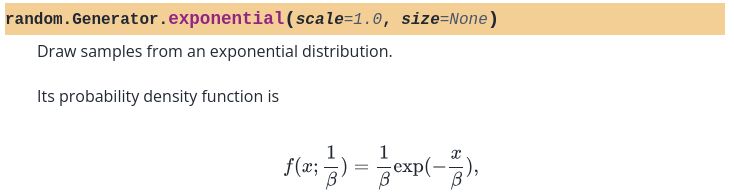

* Beta:
* 
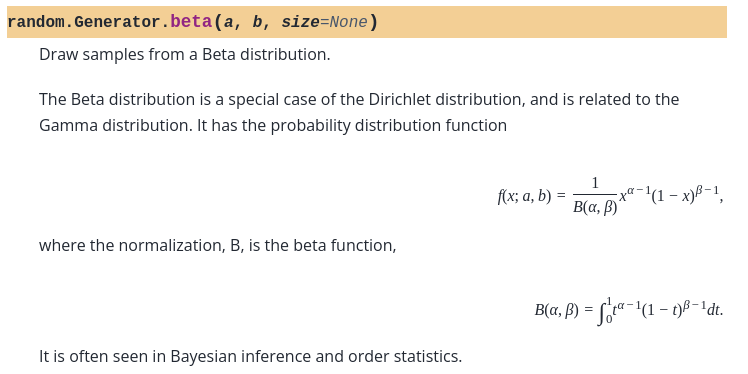

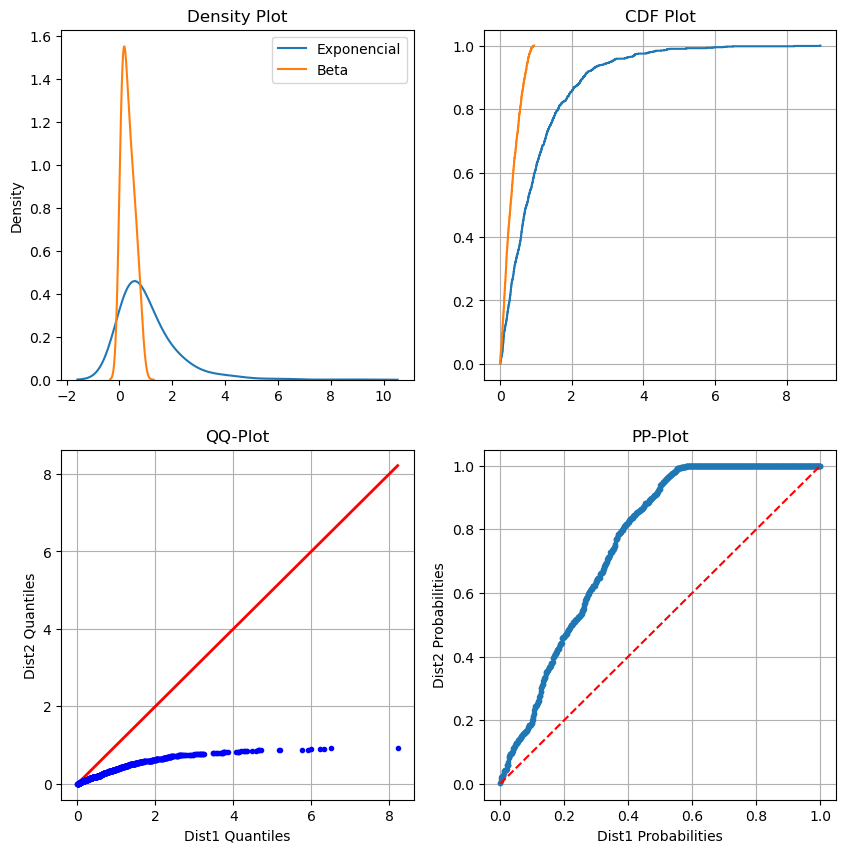

La prueba KS dice:
KstestResult(statistic=np.float64(0.441), pvalue=np.float64(8.12788713215682e-88), statistic_location=np.float64(0.7771035349827669), statistic_sign=np.int8(-1))


In [2]:
def ecdf(a):
    x, counts = np.unique(a, return_counts=True)
    cusum = np.cumsum(counts)
    return x, cusum / cusum[-1]

def compareDistributions(aTitle, distA, spsProbA, bTitle, distB, spsProbB):
    x1, y1 = ecdf(distA)
    x2, y2 = ecdf(distB)
    plt.figure(figsize=(10, 10))
    
    # Distancia KS
    # ksStat, pvalue = sps.ks_2samp(distA, distB)
    # ks_index = np.argmax(np.abs(distA - distB))
    # ks_x = distA[ks_index]
    # ks_y1, ks_y2 = F1[ks_x], F2[ks_x]
    
    # Density Functions DF
    plt.subplot(2,2,1)
    sns.kdeplot(distA, bw_method=0.5, label=aTitle)
    sns.kdeplot(distB, bw_method=0.5, label=bTitle)
    plt.legend()
    plt.title('Density Plot')
    
    # Distribution Functions CDF
    plt.subplot(2,2,2)
    plt.plot(x1, y1, drawstyle='steps-post')
    plt.plot(x2, y2, drawstyle='steps-post')
    plt.grid(True)
    plt.title('CDF Plot')
    
    # QQ-plot
    plt.subplot(2,2,3)
    qqs = np.linspace(0., 1., 1001)[:-1]
    qq1 = np.quantile(distA, qqs)
    qq2 = np.quantile(distB, qqs)
    minq = min(qq1.min(), qq2.min())
    maxq = max(qq1.max(), qq2.max())
    plt.plot([minq,maxq], [minq,maxq], 'r-', lw=2)
    plt.plot(qq1, qq2, 'b.', drawstyle='steps-post')
    plt.grid(True)
    plt.title('QQ-Plot')
    plt.xlabel('Dist1 Quantiles')
    plt.ylabel('Dist2 Quantiles') 
    
    # PP-plot
    plt.subplot(2,2,4)
    sorted_data1 = np.sort(distA)
    sorted_data2 = np.sort(distB)

    cdf_data1 = np.array([sps.percentileofscore(sorted_data2, x, kind='mean') for x in sorted_data1]) / 100
    cdf_data2 = np.linspace(0, 1, len(sorted_data1))  # Uniformly spaced percentiles

    plt.plot(cdf_data2, cdf_data1, 'o', markersize=3, label="PP-Plot")
    plt.plot([0, 1], [0, 1], 'r--', label="45-degree line (Perfect Match)")
    plt.grid(True)
    plt.title('PP-Plot')
    plt.xlabel('Dist1 Probabilities')
    plt.ylabel('Dist2 Probabilities') 

    plt.show()

    print("La prueba KS dice:")
    print(sps.kstest(distA, distB))

size = 1000
rng = np.random.default_rng()
exp = rng.exponential(size=size)
beta = rng.beta(1, 2, size=size)

compareDistributions("Exponencial", exp, sps.expon(1), "Beta", beta, sps.beta(1,2))

## Comparación con ejercicio anterior

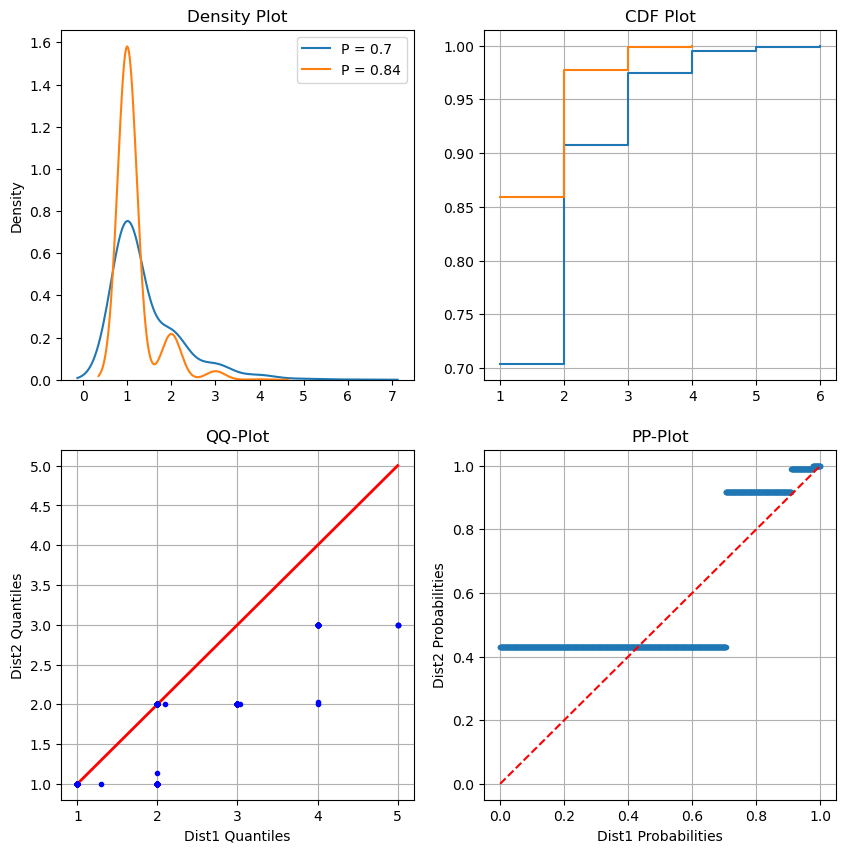

La prueba KS dice:
KstestResult(statistic=np.float64(0.155), pvalue=np.float64(6.763913130197589e-11), statistic_location=np.int64(1), statistic_sign=np.int8(-1))


In [6]:
p = 0.7
N = 1000

data1 = np.random.geometric(p, N)
data2 = np.random.geometric(1.2 * p, N)

compareDistributions("P = 0.7", data1, None, "P = "+str(1.2*p), data2, None)

# Ejercicio 3

Aplicar las comparaciones del Ejercicio 4, así como la prueba estadística de Kolmogorov-Smirnov para determinar si los datos
del primer dígito no-nulo en el conjunto de áreas se comporta de acuerdo a la ley de Benford o no. Explique sus conclusiones.

In [ ]:
data = pd.read_csv("areas.csv", sep=";")
print(data)

def benford(d):
    return math.log10(1.0+1.0/d)


probs = [benford(x+1) for x in range(9)]

print(probs)

rng = sps.sampling.DiscreteGuideTable(probs, domain=(1,9))



data["First Digit"] = data["Area in square kilometres"].astype(str).str.replace(r"\D", "", regex=True).str[0].astype(int)
data = data[data["First Digit"] != 0]

sampleSize = len(data["First Digit"])
theoreticalSample = rng.rvs(size=sampleSize)

# print("THEORY: ", theoreticalSample)
# print("DATA: ", data["First Digit"])

compareDistributions("TEORIA", theoreticalSample, None, "REALIDAD", data["First Digit"], None)